<a href="https://colab.research.google.com/github/Vo-Linh/FDS_TimeSeries/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

## Date and Time Data Types and Tools

In [2]:
now = datetime.now()
now

datetime.datetime(2022, 11, 27, 13, 12, 57, 537400)

In [3]:
now.year, now.month, now.day

(2022, 11, 27)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [5]:
delta.days, delta.seconds

(926, 56700)

In [6]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [7]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting between string and datetime

In [8]:
stamp = datetime(2011, 1, 3)

In [9]:
str(stamp)

'2011-01-03 00:00:00'

In [10]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [11]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [12]:
datestrs = ['7/6/2011', '8/6/2011']

In [13]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [14]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [16]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [17]:
datestrs

['7/6/2011', '8/6/2011']

In [18]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [19]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [20]:
idx[2]

NaT

In [21]:
pd.isnull(idx)

array([False, False,  True])

## Time Series Basics

In [22]:
import numpy as np
import pandas as pd
from datetime import datetime
from pandas import Series

In [23]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.920715
2011-01-05   -0.468769
2011-01-07   -0.320901
2011-01-08    0.014717
2011-01-10    0.411708
2011-01-12    0.557919
dtype: float64

Đưa các đối tượng datetime() chứa thông tin vào một list là biến dates,tạo một series biến ts và thêm các giá trị ngẫu nhiên với từng index thuộc biến dates

Kiểm tra biến ts và thấy biến thuộc loại Time-Series

In [24]:

type(ts)

pandas.core.series.Series

Pandas.Series.index cho thấy chỉ mục (nhãn trục) của Series, đối
tượng datetime này đã được đưa vào một DatetimeIndex.

In [25]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Các phép toán số học giữa các time series indexed khác nhau sẽ tự động căn chỉnh vào các dates, s[::2] chỉ chứa những index từ 0 với bước nhảy là 2 nên
ta thấy output những giá trị tại index lẻ là NaN

In [26]:
ts + ts[::2]

2011-01-02    1.841429
2011-01-05         NaN
2011-01-07   -0.641803
2011-01-08         NaN
2011-01-10    0.823417
2011-01-12         NaN
dtype: float64

Pandas lưu trữ timestamps bằng cách sử dụng loại dữ liệu datetime64
của NumPy ở độ phân giải nano giây

In [27]:
ts.index.dtype

dtype('<M8[ns]')

Xem Timestamp của biến ts tại index đầu tiên, vì ta không đặt
time cho index đầu tiên nên time lúc in ra là 00:00:00

In [28]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

TimeSeries là một lớp con của Series và do đó hoạt động theo cùng một cách đối với idexing và chọn dữ liệu dựa trên nhãn

In [29]:
stamp = ts.index[2]
ts[stamp]

-0.3209014366226046

Có thể ghi ngày tháng năm cách nhau bằng dấu / như trên

In [30]:
ts['1/10/2011']

0.4117083575223513

Hoặc ghi liền (nhưng phải đúng thứ tự) chương trình vẫn có
thể hiểu được ngày tháng năm trong chuỗichuỗi

In [31]:
ts['20110110']

0.4117083575223513

Tạo một series

In [32]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000',
                      periods=1000))
longer_ts

2000-01-01   -0.992641
2000-01-02    0.421838
2000-01-03   -1.594143
2000-01-04    0.318361
2000-01-05    0.666416
                ...   
2002-09-22    0.544743
2002-09-23   -0.740700
2002-09-24    1.477491
2002-09-25    0.573593
2002-09-26    1.427608
Freq: D, Length: 1000, dtype: float64

Chọn với thời gian là năm (longer_ts[’2001’])

In [33]:
longer_ts['2001']

2001-01-01   -0.696630
2001-01-02   -1.832920
2001-01-03    1.473878
2001-01-04    0.576111
2001-01-05   -1.660009
                ...   
2001-12-27   -0.423800
2001-12-28   -0.685547
2001-12-29   -3.334835
2001-12-30   -0.699220
2001-12-31    0.627179
Freq: D, Length: 365, dtype: float64

Chọn với thời gian là năm và tháng (longer_ts[’2001-05’] )

In [34]:
longer_ts['2001-05']

2001-05-01   -1.105513
2001-05-02   -0.764125
2001-05-03    0.259487
2001-05-04    0.659177
2001-05-05    1.038433
2001-05-06    1.299676
2001-05-07   -0.053376
2001-05-08   -0.287832
2001-05-09   -0.615134
2001-05-10    0.699498
2001-05-11    0.675722
2001-05-12    1.322675
2001-05-13    1.242320
2001-05-14    1.406930
2001-05-15   -1.425016
2001-05-16   -0.258147
2001-05-17   -2.223304
2001-05-18   -0.131040
2001-05-19   -1.796399
2001-05-20    0.337916
2001-05-21    0.275670
2001-05-22   -1.680722
2001-05-23   -0.921117
2001-05-24    0.806254
2001-05-25    0.110932
2001-05-26    0.408350
2001-05-27    0.495548
2001-05-28    0.567900
2001-05-29    1.062844
2001-05-30    0.058694
2001-05-31   -0.388083
Freq: D, dtype: float64

Việc cắt (slicing) dữ liệu hoạt động như một Series thông thường

In [35]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.320901
2011-01-08    0.014717
2011-01-10    0.411708
2011-01-12    0.557919
dtype: float64

Căt trong khoảng từ 1/6/2011 đến 1/11/2011

In [36]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.320901
2011-01-08    0.014717
2011-01-10    0.411708
dtype: float64

Hàm truncate(after=’1/9/2011’) cho phép ta cắt đi khoảng thời
gian sau 1/9/2011

In [37]:
ts.truncate(after='1/9/2011')

2011-01-02    0.920715
2011-01-05   -0.468769
2011-01-07   -0.320901
2011-01-08    0.014717
dtype: float64

Tạo biến date với pd.date_range() lấy một dải thời gian với
số lượng là 100 và tần suất là thứ tư hàng tuần (freq=’W-WED’) và tạo
dataframe long_d, ,ix[] ở đây hoạt động như khi ta cắt dữ liệu (thay .ix bằng .loc vì .ix bị loại bỏ )

In [38]:
dates = pd.date_range('1/1/2000', periods=100,
                       freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                    index=dates, columns=
                    ['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.401816,0.598156,0.141186,1.531759
2001-05-09,-0.561450,-0.791213,-0.869426,-1.391193
2001-05-16,0.184234,-1.271695,-1.705987,0.005627
2001-05-23,1.152132,1.555277,1.310416,0.954392
2001-05-30,-0.620340,-0.850109,-0.649362,0.962725


### Time Series with Duplicate Indices

pd.DatetimeIndex, hàm này giống như mảng (ndarray) bất biến của
dữ liệu datetime64.

In [39]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000',
                         '1/2/2000','1/2/2000','1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

 Kiểm
tra thuộc tính is_unique 

In [40]:
dup_ts.index.is_unique

False

Indexing vào time series này bây giờ sẽ tạo ra các giá trị vô hướng hoặc
các phần cắt tùy thuộc vào việc liệu một timestamp có bị trùng lặp hay
không.

In [41]:
dup_ts['1/3/2000']    #not  duplicated

4

ở trên chỉ in ra một giá trị. Còn bên dưới in ra một phần
đã được cắt của một timestamp đã bị trùng.

In [42]:
dup_ts['1/2/2000']    #duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

Tổng hợp dữ liệu có timestamps không phải là duy
nhất, sử dụng groupby và đặt mức = 0
(mức index)

In [43]:
grouped = dup_ts.groupby(level=0)

grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

Đếm tần suất xuất hiện các index (count())

In [44]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [45]:
import numpy as np
import pandas as pd
from datetime import datetime
from pandas import Series

In [46]:
ts

2011-01-02    0.920715
2011-01-05   -0.468769
2011-01-07   -0.320901
2011-01-08    0.014717
2011-01-10    0.411708
2011-01-12    0.557919
dtype: float64

In [47]:
ts.resample('D')

### Generating Date Ranges

In [48]:
index = pd.date_range('4/1/2012', '6/1/2012')

In [49]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [50]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [52]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [53]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [54]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [55]:
from pandas.tseries.offsets import Hour, Minute

In [56]:
hour = Hour()

In [57]:
hour

<Hour>

In [58]:
four_hours = Hour(4)

In [59]:
four_hours

<4 * Hours>

In [60]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [61]:
Hour(2) + Minute(30)

<150 * Minutes>

In [62]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [63]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')

In [64]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [65]:
ts = Series(np.random.randn(4),index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [66]:
ts

2000-01-31   -0.866773
2000-02-29   -1.189242
2000-03-31   -0.056590
2000-04-30    0.364079
Freq: M, dtype: float64

In [67]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.866773
2000-04-30   -1.189242
Freq: M, dtype: float64

In [68]:
ts.shift(-2)

2000-01-31   -0.056590
2000-02-29    0.364079
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [69]:
ts.shift(2, freq='M')

2000-03-31   -0.866773
2000-04-30   -1.189242
2000-05-31   -0.056590
2000-06-30    0.364079
Freq: M, dtype: float64

In [70]:
ts.shift(3, freq='D')

2000-02-03   -0.866773
2000-03-03   -1.189242
2000-04-03   -0.056590
2000-05-03    0.364079
dtype: float64

In [71]:
ts.shift(1, freq='3D')

2000-02-03   -0.866773
2000-03-03   -1.189242
2000-04-03   -0.056590
2000-05-03    0.364079
dtype: float64

In [72]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.866773
2000-02-29 01:30:00   -1.189242
2000-03-31 01:30:00   -0.056590
2000-04-30 01:30:00    0.364079
dtype: float64

#### Shifting dates with offsets

In [73]:
from pandas.tseries.offsets import Day, MonthEnd

In [74]:
now = datetime(2011, 11, 17)

In [75]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [76]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [77]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [78]:
offset = MonthEnd()

In [79]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [80]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [81]:
ts = Series(np.random.randn(20),index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [82]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.172249
2000-02-29   -0.041236
2000-03-31   -0.304855
dtype: float64

In [83]:
ts.resample('M').mean()

2000-01-31   -0.172249
2000-02-29   -0.041236
2000-03-31   -0.304855
Freq: M, dtype: float64

## Time Zone Handling

In [84]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [85]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### Localization and Conversion

In [86]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.799444
2012-03-10 09:30:00   -0.324228
2012-03-11 09:30:00   -0.627089
2012-03-12 09:30:00   -0.249856
2012-03-13 09:30:00    0.505119
2012-03-14 09:30:00    1.921630
Freq: D, dtype: float64

In [87]:
print(ts.index.tz)

None


In [88]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [89]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.799444
2012-03-10 09:30:00+00:00   -0.324228
2012-03-11 09:30:00+00:00   -0.627089
2012-03-12 09:30:00+00:00   -0.249856
2012-03-13 09:30:00+00:00    0.505119
2012-03-14 09:30:00+00:00    1.921630
Freq: D, dtype: float64

In [90]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [91]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00   -0.799444
2012-03-10 04:30:00-05:00   -0.324228
2012-03-11 05:30:00-04:00   -0.627089
2012-03-12 05:30:00-04:00   -0.249856
2012-03-13 05:30:00-04:00    0.505119
2012-03-14 05:30:00-04:00    1.921630
Freq: D, dtype: float64

In [92]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.799444
2012-03-10 14:30:00+00:00   -0.324228
2012-03-11 13:30:00+00:00   -0.627089
2012-03-12 13:30:00+00:00   -0.249856
2012-03-13 13:30:00+00:00    0.505119
2012-03-14 13:30:00+00:00    1.921630
dtype: float64

In [93]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.799444
2012-03-10 15:30:00+01:00   -0.324228
2012-03-11 14:30:00+01:00   -0.627089
2012-03-12 14:30:00+01:00   -0.249856
2012-03-13 14:30:00+01:00    0.505119
2012-03-14 14:30:00+01:00    1.921630
dtype: float64

In [94]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with Time Zone−aware Timestamp Objects

In [95]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [96]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [97]:
stamp_utc.value

1299902400000000000

In [98]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [99]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [100]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [101]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations between Different Time Zones

In [102]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.100706
2012-03-08 09:30:00    2.720641
2012-03-09 09:30:00   -0.909360
2012-03-12 09:30:00    0.356147
2012-03-13 09:30:00   -0.416827
2012-03-14 09:30:00   -0.204772
2012-03-15 09:30:00   -0.043217
2012-03-16 09:30:00   -0.390806
2012-03-19 09:30:00    0.274557
2012-03-20 09:30:00    1.434568
Freq: B, dtype: float64

In [103]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## Periods and Period Arithmetic

Khoảng thời gian biểu thị thời gian như ngày, tháng, quý hoặc năm. Lớp Period
cần được truyền vào 1 chuỗi hoặc số nguyên và tham số freq

In [104]:
from datetime import datetime
import pandas as pd
import numpy as np
from pandas import Series
p = pd.Period('2007', freq='A-DEC')
p


Period('2007', 'A-DEC')

Trong trường hợp này, đối tượng Period biểu diễn toàn bộ khoảng thời gian từ 1/1/2007 đến 31/12/2007. Và cái việc này nó rất là tiện lợi cho việc cộng trừ số nguyên từ các period có tác dụng dịch chuyển theo tần số của chúng.

In [105]:
p + 5 

Period('2012', 'A-DEC')

In [106]:
p - 2

Period('2005', 'A-DEC')

Nếu hai chu kỳ có cùng tần số, sự khác nhau giữa chúng là số những đơn vị giữa chúng:

In [107]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

Phạm vi chu kỳ thông thường có thể được tạo bằng cách sử dụng hàm period\_range:

In [108]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

Lớp PeriodIndex lưu trữ một chuỗi các khoảng thời gian và có thể phục vụ như chỉ số trục trong bất kỳ cấu trúc dữ liệu Pandas nào:

In [109]:
Series(np.random.randn(6), index=rng)

2000-01   -1.240043
2000-02   -1.591546
2000-03    0.254422
2000-04    0.166401
2000-05    0.242503
2000-06    0.642421
Freq: M, dtype: float64

Nếu bạn có một mảng các chuỗi, bạn cũng có thể kháng nghị chính lớp PeriodIndex:

In [110]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Period Frequency Conversion

Các đối tượng Chu kỳ có thể được chuyển đổi sang tần số khác bằng cách sử dụng phương thức asfreq. Ví dụ: giả sử chúng tôi có một khoảng thời gian hàng năm và muốn chuyển đổi nó vào một khoảng thời gian hàng tháng vào đầu hoặc cuối năm. Đây là phường khá đơn giản:

In [111]:
p=pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [112]:
p=pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='end')

Period('2007-12', 'M')

Ta có thể thấy Period('2007', 'A-DEC') là một con trỏ trỏ đến khoảng thời gian
được chia nhỏ cho hằng tháng. Đối với những năm kết thúc vào tháng mà không phải
tháng 12, các kỳ , giai đoạn của tháng khác nhau:

In [113]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [114]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'end')

Period('2007-06', 'M')

Khi chuyển đổi từ tần số cao sang thấp, siêu chu kỳ sẽ được xác định tại nơi
thuộc về các chu kỳ con. Ví dụ, vào chu kỳ A-JUN tháng 8 năm 2007 thực chất
là một phần của năm 2008:

In [115]:
p = pd.Period('2007-08', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

Toàn bộ các đối tượng PeriodIndex hay TimeSeries có thể chuyển đổi cùng một
cách:

In [116]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.210824
2007    1.203972
2008    1.199234
2009   -0.427992
Freq: A-DEC, dtype: float64

In [117]:
ts.asfreq('M', how='start')

2006-01   -0.210824
2007-01    1.203972
2008-01    1.199234
2009-01   -0.427992
Freq: M, dtype: float64

In [118]:
ts.asfreq('B', how='end')

2006-12-29   -0.210824
2007-12-31    1.203972
2008-12-31    1.199234
2009-12-31   -0.427992
Freq: B, dtype: float64

### Quarterly Period Frequencies

Dữ liệu hàng quý là tiêu chuẩn trong kế toán, tài chính và các lĩnh vực khác. Nhiều dữ liệu hàng quý được báo cáo liên quan đến ngày kết thúc năm tài chính, thường là ngày dương lịch hoặc ngày làm việc cuối cùng của một của 12 tháng trong năm. Như vậy, giai đoạn 2012 Q4 có một ý nghĩa khác khi chờ kết thúc năm tài chính. Pandas hỗ trợ tất cả 12 tần suất hàng quý có thể có từ Q JAN đến Q-DEC:

In [119]:
p = pd.Period('2012Q4', freq='Q-JAN')

Trong trường hợp năm tài chính kết thúc vào tháng 1, quý 4 năm 2012 kéo dài từ tháng 11 đến tháng 1, bạn có thể kiểm tra quý này bằng cách chuyển đổi sang tần suất hàng ngày. Xem Hình 10-2 để biết
hình minh họa:

In [120]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [121]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

Do đó, có thể thực hiện phép tính thời gian rất dễ dàng; ví dụ: để lấy dấu thời gian
lúc 4 giờ chiều ngày làm việc thứ 2 đến ngày làm việc cuối cùng của quý, bạn có thể thực hiện:

In [122]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [123]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

Tạo phạm vi hàng quý hoạt động như bạn mong đợi bằng cách sử dụng period_range.

In [124]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [125]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)

Các đối tượng Series và DataFrame được lập chỉ mục theo dấu thời gian có thể được chuyển đổi thành các khoảng thời gian bằng cách sử dụng
phương thức to_period:

In [126]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(np.random.randn(3), index=rng)
ts = ts.to_period()
ts

2000-01    0.437149
2000-02   -0.258853
2000-03   -0.085306
Freq: M, dtype: float64

In [127]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(np.random.randn(3), index=rng)
pts = ts.to_period()
pts

2000-01    0.087142
2000-02    0.752816
2000-03   -0.746991
Freq: M, dtype: float64

Vì các khoảng thời gian luôn đề cập đến các khoảng thời gian không chồng chéo nên dấu thời gian chỉ có thể thuộc về đến một khoảng thời gian duy nhất cho một tần số nhất định. Trong khi tần suất của PeriodIndex mới là được suy ra từ dấu thời gian theo mặc định, bạn có thể chỉ định bất kỳ tần suất nào bạn muốn. Ở đó cũng không có vấn đề gì với việc có các khoảng thời gian trùng lặp trong kết quả:

In [128]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(np.random.randn(6), index=rng)
ts2.to_period('M')

2000-01   -1.756002
2000-01    0.267894
2000-01    0.386207
2000-02   -0.232188
2000-02   -0.886410
2000-02    0.491052
Freq: M, dtype: float64

Để chuyển đổi ngược lại, ta dùng hàm to_timestamp:

In [129]:
pts = ts.to_period()
pts

2000-01    0.087142
2000-02    0.752816
2000-03   -0.746991
Freq: M, dtype: float64

In [130]:
pts.to_timestamp(how='end')


2000-01-31 23:59:59.999999999    0.087142
2000-02-29 23:59:59.999999999    0.752816
2000-03-31 23:59:59.999999999   -0.746991
dtype: float64

### Creating a PeriodIndex from Arrays

Các bộ dữ liệu tần số cố định đôi khi được lưu trữ với thông tin về khoảng thời gian
trên nhiều cột. Ví dụ: trong bộ dữ liệu kinh tế vĩ mô này, năm và quý nằm trong các cột khác nhau:

In [131]:
url = 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/examples/macrodata.csv'
data = pd.read_csv(url)
data.year

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [132]:

data = pd.read_csv(url)
data.quarter

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

Bằng cách chuyển các mảng này tới Period với tần suất, chúng có thể được kết hợp để tạo thành
một chỉ mục cho DataFrame:

In [133]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [134]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency Conversion

Lấy mẫu lại đề cập đến quá trình chuyển đổi một chuỗi thời gian từ tần số này sang tần số khác:
+ **Downsampling**: Giảm tần suất lấy mẫu bằng cách tăng thời gian lấy
mẫu từ vài phút đến vài giờ.
+ **Upsampling**: Tăng tần suất lấy mẫu bằng cách giảm thời gian lấy mẫu từ
vài giờ xuống vài phút.


**Cú pháp:**

```

Series.resample(self, rule, how=None, axis=0, fill_method=None, closed=None,
 label=None convention='start', kind=None, loffset=None, limit=None, base=0, on=None, level=None)

```



In [136]:
from numpy.random import randn

rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = pd.Series(randn(len(rng)), index=rng)
ts.resample('M').mean()


2000-01-31    0.108556
2000-02-29   -0.088328
2000-03-31   -0.069715
2000-04-30    0.487104
Freq: M, dtype: float64

In [137]:
ts.resample('M', kind='period').mean()

2000-01    0.108556
2000-02   -0.088328
2000-03   -0.069715
2000-04    0.487104
Freq: M, dtype: float64

**Resample** là một phương pháp linh hoạt và hiệu suất cao có thể được sử dụng để xử lý chuỗi thời gian rất lớn.

### Downsampling

Dữ liệu bạn đang tổng hợp không cần phải được sửa thường xuyên, tần số mong muốn xác định các cạnh bin được sử dụng để chia chuỗi thời gian thành nhiều phần để tổng hợp lại.

Khi sử dụng **resample để giảm dữ** liệu mẫu cần chú ý:
+ Phía nào của mỗi khoảng được đóng lại
+ Cách dán nhãn cho mỗi thùng tổng hợp, có thể bắt đầu khoảng thời gian hoặc kết thúc


In [138]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts


2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

Muốn tổng hợp dữ liệu này thành các phần dài năm phút hoặc các thanh bằng cách lấy tổng của mỗi nhóm:

In [139]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

Theo mặc định, cạnh thùng bên phải được inclusive, vì vậy giá trị 00:05 được bao gồm trong khoảng thời gian từ 00:00 đến 00:05. 1 Passing **closed= 'left'** thay đổi khoảng thời gian được đóng ở bên trái:

In [140]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [141]:
ts.resample('5min', closed='left', label='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

Có thể thay đổi chỉ số kết quả, chẳng hạn như trừ đi một giây từ cạnh bên phải để làm rõ hơn khoảng thời gian nào mà dấu thời gian đề cập đến. 


Để thực hiện việc này, chuyển một chuỗi hoặc bù ngày vào loffset:

In [142]:
ts.resample('5min', loffset='-1s').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """Entry point for launching an IPython kernel.


1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

Một cách phổ biến để tổng hợp chuỗi thời gian là tính toán bốn giá trị cho
mỗi nhóm: 
+ Giá trị đầu tiên (mở)
+ Cuối cùng (đóng) 
+ Tối đa (cao) 
+ Tối thiểu (thấp).


In [143]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Resampling with GroupBy

Một cách thay thế để giảm mẫu là sử dụng chức năng phân nhóm 

**Cú pháp:**
```
DataFrame.groupby(by=None, axis=0, level=None, as_index=True,sort=True, group_keys=_NoDefault.no_default, squeeze=_NoDefault.no_default, observed=False, dropna=True)
```



In [144]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()


1    15.0
2    45.0
3    75.0
4    95.0
dtype: float64

In [145]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### Upsampling and Interpolation


In [146]:
frame = pd.DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]


,Colorado,Texas,New York,Ohio
2000-01-05,0.491731,-0.949833,-0.137525,0.397080
2000-01-12,0.629056,0.265169,-0.893407,0.592949


Khi lấy mẫu lại tần suất hàng ngày, các giá trị bị thiếu theo mặc định sẽ được đưa vào:

In [147]:
df_daily = frame.resample('D')
df_daily


Các phương pháp điền hoặc nội suy tương tự có sẵn trong các phương pháp điền và lập chỉ mục là có sẵn để lấy mẫu lại:


In [148]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.491731,-0.949833,-0.137525,0.397080
2000-01-06,0.491731,-0.949833,-0.137525,0.397080
2000-01-07,0.491731,-0.949833,-0.137525,0.397080
2000-01-08,0.491731,-0.949833,-0.137525,0.397080
2000-01-09,0.491731,-0.949833,-0.137525,0.397080
2000-01-10,0.491731,-0.949833,-0.137525,0.397080
2000-01-11,0.491731,-0.949833,-0.137525,0.397080
2000-01-12,0.629056,0.265169,-0.893407,0.592949


Tương tự, cũng có thể chọn chỉ điền vào một số khoảng thời gian nhất định về phía trước để giới hạn khoảng cách tiếp tục sử dụng một giá trị quan sát:

In [149]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.491731,-0.949833,-0.137525,0.397080
2000-01-13,0.629056,0.265169,-0.893407,0.592949


### Resampling with Periods

Việc lấy mẫu ngược có nhiều sắc thái hơn vì phải đưa ra quyết định về điểm cuối của khoảng thời gian trong tần suất mới để đặt các giá trị trước khi lấy mẫu lại, giống như **phương pháp asfreq**. Đối số quy ước mặc định là 'end' nhưng cũng có thể là 'start':

In [150]:
annual_frame = frame.resample('A-DEC').mean()

In [151]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000-12-31,0.560393,-0.342332,-0.515466,0.495014


In [152]:
annual_frame.resample('Q-DEC', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000-12-31,0.560393,-0.342332,-0.515466,0.495014


Các quy tắc về lấy mẫu lên và lấy mẫu xuống
+ Trong lấy mẫu xuống, tần số đích phải là tần số con của tần số nguồn.
+ Trong upsampling, tần số đích phải là một siêu nghiệm của tần số nguồn. Nếu các quy tắc này không được thỏa mãn, một ngoại lệ sẽ được đưa ra. Điều này chủ yếu ảnh hưởng đến tần suất hàng quý, hàng năm và hàng tuần; ví dụ: các khoảng thời gian được xác định bởi Q-MAR chỉ phù hợp với A-MAR, A-JUN, A-SEP và A-DEC:


In [153]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000-12-31,0.560393,-0.342332,-0.515466,0.495014


## Time Series Plotting

Các biểu đồ của pandas time-series đã cải thiện định dạng ngày so với biểu đồ của matplotlib, ta có thể thấy trong ví dụ sau.

Ví dụ: Chúng ta tải xuống một số dữ liệu về giá cổ phiếu của một số cổ phiếu phổ biến của Hoa Kỳ từ Yahoo! Finance:

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series

In [155]:
url = 'https://raw.githubusercontent.com/wangruinju/python-for-data-analysis/master/ch09/stock_px.csv'
close_px_all = pd.read_csv(url, parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


Việc gọi một trong các cột của biểu đồ trên sẽ tạo thành một biểu đồ đơn giản, thấy như trong biểu đồ sau

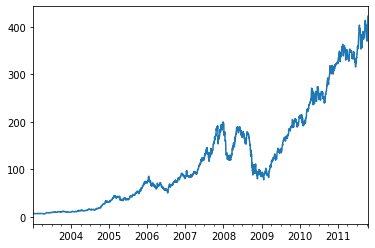

In [156]:
close_px['AAPL'].plot()

Khi gọi trên DataFrame, tất cả các time-series được vẽ trên một ô con duy nhất với chú thích cho biết đó là ô nào. Biểu đồ bên dưới giúp bạn có thể thấy cách mà cả tháng và năm được định dạng trên trục X

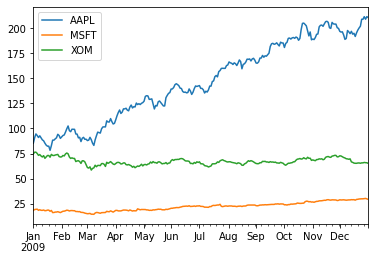

In [157]:
close_px.loc['2009'].plot()

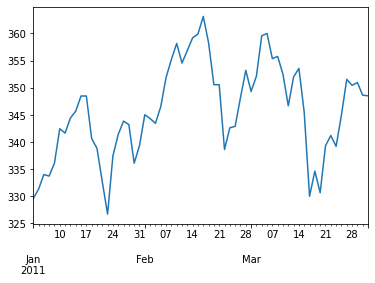

In [158]:
 close_px['AAPL'].loc['01-2011':'03-2011'].plot()

Dữ liệu tần suất hàng quý cũng được định dạng tốt hơn so với điểm đánh dấu hàng quý

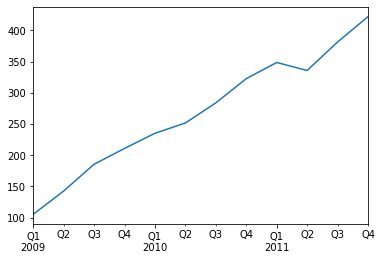

In [159]:
 appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
 appl_q.loc['2009':].plot()

Tính năng cuối cùng của time-series là bằng cách nhấp chuột phải và kéo để phóng to và thu nhỏ, ngày tháng sẽ được mở rộng hoặc thu nhỏ và định dạng lại tùy thuộc vào khoảng thời gian có trong chế độ xem biểu đồ. Với matplotlib, điều này chỉ đúng khi sử dụng ở chế độ tương tác.

## Moving Window Functions





Một lớp phổ biến của phép biến đổi mảng cho các phép toán time-series là thống kê, các hàm khác được đánh giá qua sliding window hoặc đánh giá với trọng số giảm dần theo cấp số nhân. Ta gọi đây là **moving window functions** (chức năng này tự động loại trừ các dữ liệu bị thiếu)

***rolling_mean*** là giá trị trung bình của một số khoảng thời gian 
nhất định trước đó trong một time-series.

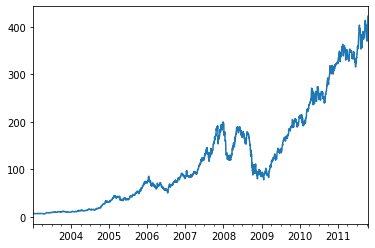

In [160]:
close_px.AAPL.plot()

In [161]:
close_px.AAPL.rolling(250).mean()

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    347.58772
2011-10-11    347.95668
2011-10-12    348.33412
2011-10-13    348.74688
2011-10-14    349.23096
Freq: B, Name: AAPL, Length: 2292, dtype: float64

Các hàm như ***rolling_mean*** yêu cầu số lượng non-NA được chỉ định. Hoạt động này có thể được dùng để giải thích cho dữ liệu bị thiếu.

In [162]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

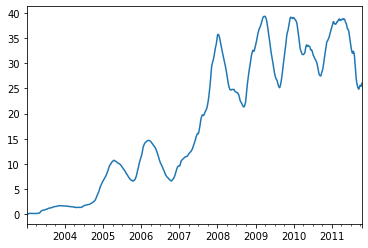

In [163]:
appl_std250.plot()

Để tính giá trị expanding window mean, có thể thấy rằng expanding window (cửa sổ mở rộng ) chỉ là một trường hợp đặc biệt trong đó window là độ dài của time-series, nhưng chỉ cần một hoặc nhiều periods để tính giá trị:


In [164]:
# Define expanding mean in terms of rolling_mean
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

Việc gọi ***rolling\_mean*** và friends trên DataFrame sẽ áp dụng phép biến đổi cho từng cột.

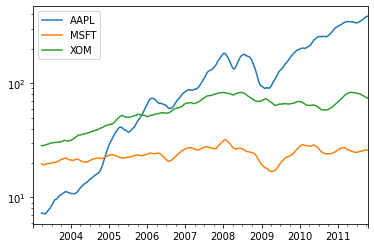

In [165]:
close_px.rolling(60).mean().plot(logy=True)

### Exponentially-weighted functions

Giải pháp thay thế cho việc sử dụng kích thước window tĩnh với các observations bằng nhau là chỉ định decay factor không đổi để tạo thêm trọng lượng cho các observations gần đây hơn.Có một số cách để chỉ định decay factor, một cách phổ biến là sử dụng một ***span***.

Vì một thống kê có trọng số theo cấp số nhân đặt nhiều trọng lượng hơn vào các observations gần đây, nên nó “thích ứng” nhanh hơn với những thay đổi so với phiên bản có trọng số bằng nhau. Dưới đây là một ví dụ so sánh đường trung bình động trong 60 ngày của giá cổ phiếu Apple với đường trung bình động EW với span = 60


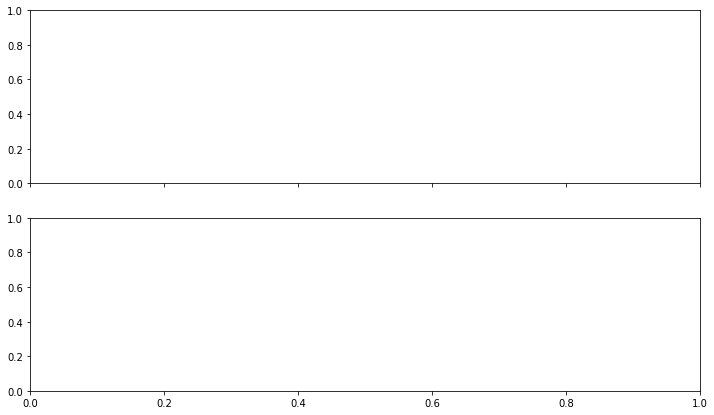

In [166]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(12, 7))

In [167]:
aapl_px = close_px.AAPL['2005':'2009']

In [168]:
ma60 = aapl_px.rolling(60, min_periods=50).mean()
ewma60 = aapl_px.ewm(span=60).mean()

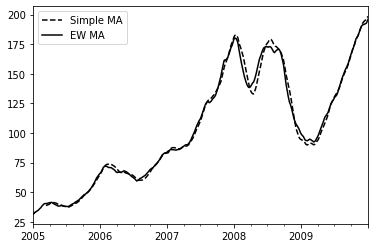

In [169]:
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

Một số toán tử thống kê, như tương quan và hiệp phương sai, cần hoạt động trên hai time-series. Ví dụ: các nhà phân tích tài chính thường quan tâm đến mối tương quan của cổ phiếu với chỉ số chuẩn như S&P 500. Chúng ta có thể tính toán điều đó bằng cách tính toán phần trăm thay đổi và sử dụng ***rolling_corr***.

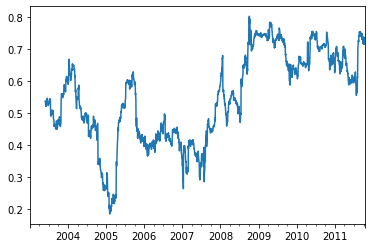

In [170]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

Hàm ***pct_change*** được dùng để tính toán phần trăm thay đổi giữa phần tử hiện tại và phần tử trước đó . Theo mặc định, hàm này tính toán phần trăm thay đổi so với hàng ngay trước đó.

Giả sử bạn muốn tính toán mối tương quan của chỉ số S&P 500 với nhiều cổ phiếu cùng một lúc. Nếu bạn chuyển một TimeSeries và một DataFrame, một hàm như ***rolling_corr*** sẽ tính toán mối tương quan của TimeSeries với mỗi cột trong DataFrame.

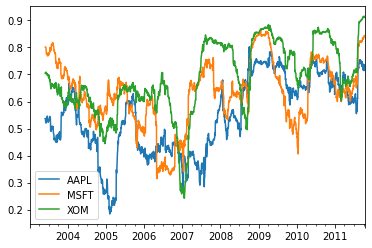

In [171]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

Hàm ***rolling_apply*** cung cấp một phương tiện để áp dụng một hàm mảng do chính bạn tạo ra trên một moving window. 

Hàm ***scipy.stats.percentileofscore*** giúp chúng ta có thể biết đến thứ hạng phần trăm của một giá trị cụ thể trên mẫu.

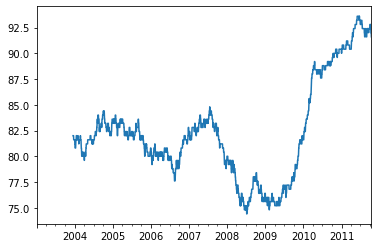

In [172]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()


## Performance and Memory Usage Notes


Về hiệu suất, pandas đã được tối ưu hóa cao cho các hoạt động căn chỉnh dữ liệu (công việc hậu trường của ts1 + ts2 được lập index khác nhau) và lấy mẫu lại. Dưới đây là một ví dụ về tổng hợp các điểm dữ liệu 10MM thành OHLC:

In [173]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00.000   -0.865284
2000-01-01 00:00:00.010   -1.200320
2000-01-01 00:00:00.020   -0.737196
2000-01-01 00:00:00.030   -0.629244
2000-01-01 00:00:00.040   -0.143463
                             ...   
2000-01-02 03:46:39.950    0.718587
2000-01-02 03:46:39.960    0.148262
2000-01-02 03:46:39.970   -1.008286
2000-01-02 03:46:39.980    0.351505
2000-01-02 03:46:39.990    0.825223
Freq: 10L, Length: 10000000, dtype: float64

In [174]:
ts.resample('15min').agg('ohlc')


,open,high,low,close
2000-01-01 00:00:00,-0.865284,4.035393,-4.372129,-0.859016
2000-01-01 00:15:00,-0.360570,4.394399,-4.281304,2.008999
2000-01-01 00:30:00,0.529652,4.024631,-3.978609,-0.947370
2000-01-01 00:45:00,1.512198,4.061501,-4.339185,-0.669132
2000-01-01 01:00:00,1.685991,4.445415,-4.384101,-0.373362
...,...,...,...,...
2000-01-02 02:45:00,-0.429377,4.275772,-4.002201,0.087353
2000-01-02 03:00:00,-1.858141,4.073454,-4.439250,1.364128
2000-01-02 03:15:00,-1.636173,4.212311,-4.251869,-0.417549
2000-01-02 03:30:00,0.346629,4.271918,-4.419407,1.016047


In [175]:
%timeit ts.resample('15min').agg('ohlc')

101 ms ± 893 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Thời gian chạy có thể phụ thuộc vào kích thước tương đối của kết quả tổng hợp; không ngạc nhiên khi tổng hợp tần số cao hơn mất nhiều thời gian hơn để tính toán:

In [176]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s').agg('ohlc')


111 ms ± 9.63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
